# Import libraries

In [159]:
pip install pandas numpy scikit-learn matplotlib seaborn nltk

In [160]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
data=pd.read_csv('/content/labeled_data.csv')

In [162]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [163]:
data.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [165]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [166]:
data['labels']=data['class'].map({0:'hate_speech',1:'offensive_language',2:'neither'})
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",neither
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive_language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,offensive_language


In [167]:
df=data[["tweet","labels"]]
df

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_language
24779,"you've gone and broke the wrong heart baby, an...",neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive_language
24781,youu got wild bitches tellin you lies,offensive_language


In [168]:
from sklearn.model_selection import train_test_split

nltk.download("stopwords")
stopwords=set(stopwords.words("english"))
stemmer=nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
def clean_data(text):
  text=str(text).lower()
  text=re.sub('https?://\S+|www\.S+','',text)
  text=re.sub('\[.*?\]','',text)
  text=re.sub('<.*?>+','', text)
  text=re.sub('[%s]' %re.escape(string.punctuation),'', text)
  text=re.sub('\n', '', text)
  text=re.sub('\w*\d\w*','', text)
#Stop words removal
  text =[word for word in text.split(' ') if word not in stopwords]
  text=" ".join(text)
#Stemming the text
  text =[stemmer.stem(word) for word in text.split()]
  text =" ".join(text)
  return text

In [170]:
df['tweet'] = df['tweet'].apply(clean_data)


<ipython-input-170-2f1b85769727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'] = df['tweet'].apply(clean_data)


In [171]:
df

,tweet,labels
0,rt mayasolov woman shouldnt complain clean hou...,neither
1,rt boy dat coldtyga dwn bad cuffin dat hoe place,offensive_language
2,rt urkindofbrand dawg rt ever fuck bitch start...,offensive_language
3,rt cganderson vivabas look like tranni,offensive_language
4,rt shenikarobert shit hear might true might fa...,offensive_language
...,...,...
24778,yous muthafin lie coreyemanuel right tl trash ...,offensive_language
24779,youv gone broke wrong heart babi drove redneck...,neither
24780,young buck wanna eat dat nigguh like aint fuck...,offensive_language
24781,youu got wild bitch tellin lie,offensive_language


In [172]:
x=np.array(df['tweet'])
y=np.array(df['labels'])

In [173]:
x

array(['rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       'rt boy dat coldtyga dwn bad cuffin dat hoe place',
       'rt urkindofbrand dawg rt ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl ntac eileen dahlia beauti color combin pink orang yellow amp white coll'],
      dtype=object)

In [174]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [175]:
cv=CountVectorizer()
X=cv.fit_transform(x)

In [176]:

X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 197861 stored elements and shape (24783, 25693)>

In [177]:
X_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.33,random_state=42)

In [178]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 65250 stored elements and shape (8178, 25693)>

In [179]:
x_test

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 132611 stored elements and shape (16605, 25693)>

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

       hate_speech       0.52      0.19      0.28       988
           neither       0.81      0.85      0.83      2786
offensive_language       0.92      0.95      0.93     12831

          accuracy                           0.89     16605
         macro avg       0.75      0.66      0.68     16605
      weighted avg       0.88      0.89      0.88     16605



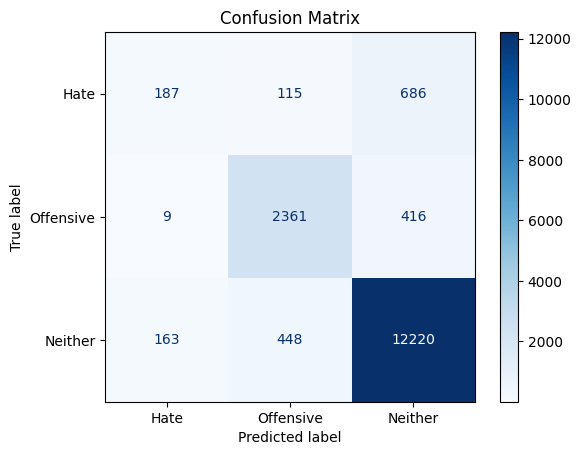

In [182]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Hate", "Offensive", "Neither"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8893706714844927